In [1]:
using LinearAlgebra
# BenchmarkTools

In [2]:
function jacobi(mat::Array{Float64,2}, sol::Array{Float64,1}, rhs::Array{Float64,1},
                maxIter::Int=100, tol::Float64=1.0e-8)

    nbrows, nbcols = size(mat)
    result = deepcopy(sol)
    residuals = Array{Float64,1}(undef, 0)

    
    numIter = 0
    while numIter < maxIter
        numIter+=1
        
        deltaSol = rhs - mat*result
        
        for i=1:nbrows
            deltaSol[i] = deltaSol[i]/mat[i,i]
        end
        
        result = result + deltaSol
        
        nrm = norm(deltaSol)
        
        push!(residuals,nrm)
        
        if nrm <= tol
            return result, numIter, residuals
        end
    end

    return result, numIter, residuals
end


jacobi (generic function with 3 methods)

In [3]:
function gaussSeidel(mat::Array{Float64,2}, sol::Array{Float64,1}, rhs::Array{Float64,1},
                maxIter::Int=100, tol::Float64=1.0e-8)

    nbrows, nbcols = size(mat)
    result = deepcopy(sol)
    deltaSol = deepcopy(sol)
    residuals = Array{Float64,1}(undef, 0)

    
    numIter = 0
    while numIter < maxIter
        
        numIter+=1
        
        for i=1:nbrows
            oldResult = result[i]
            result[i] = rhs[i]
            
            for j=1:nbcols
                if i!=j
                    result[i]-=mat[i,j]*result[j]
                end
            end
            result[i]/=mat[i,i]
            
            deltaSol[i]=result[i]-oldResult
        end
        
        nrm = norm(deltaSol)
        
        push!(residuals,nrm)
        
        if nrm <= tol
            return result, numIter, residuals
        end
        
    end
    return result, numIter, residuals
end

gaussSeidel (generic function with 3 methods)

In [4]:
function SOR(mat::Array{Float64,2}, sol::Array{Float64,1}, rhs::Array{Float64,1}, omega::Float64,
                maxIter::Int=100, tol::Float64=1.0e-8)

    nbrows, nbcols = size(mat)
    result = deepcopy(sol)
    deltaSol = deepcopy(sol)
    residuals = Array{Float64,1}(undef, 0)

    
    numIter = 0
    while numIter < maxIter
        
        numIter+=1

        for i=1:nbrows
            oldResult = result[i]
            result[i] = rhs[i]
            
            for j=1:nbcols
                if i!=j
                    result[i]-=mat[i,j]*result[j]
                end
            end
            
            result[i]*=omega
            result[i]/=mat[i,i]
            result[i]+=(1-omega)*oldResult
            
            deltaSol[i]=result[i]-oldResult
        end
        
        nrm = norm(deltaSol)
        push!(residuals,nrm)
        
        if nrm <= tol
            return result, numIter, residuals
        end
        
    end
    return result, numIter, residuals
end

SOR (generic function with 3 methods)

In [352]:
matSize = 50

A = rand(matSize, matSize);

mat = 0.5*(A+A') + Diagonal(A)*matSize*10

rhs = rand(matSize)
sol = zeros(matSize)

;

In [355]:
jacobiSol, jacobiIterNum, jacobiResiduals = jacobi(mat, sol, rhs)

gaussSeidelSol, gaussSeidelIterNum, gaussSeidelResiduals = gaussSeidel(mat, sol, rhs)

SORSol, SORIterNum, SORResiduals = SOR(mat, sol, rhs, 1.05)

;

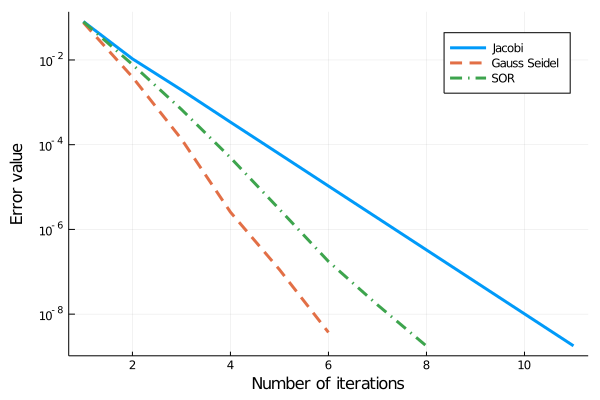

In [356]:
using Plots
x = 1:10; y = rand(10); # These are the plotting data
p = plot(jacobiResiduals, xlabel = "Number of iterations", ylabel = "Error value", lw = 3, label = "Jacobi", yaxis=:log)
plot!(p, gaussSeidelResiduals, lw = 3, label = "Gauss Seidel", linestyle=:dash)
plot!(p, SORResiduals, lw = 3, label = "SOR", linestyle=:dashdot)
# savefig(p, "file.png")